In [1]:

%pprint
%matplotlib inline
import sys
import os.path as osp

executable_path = sys.executable; scripts_folder = osp.join(osp.dirname(executable_path), 'Scripts')
py_folder = osp.abspath(osp.join(os.pardir, 'py')); ffmpeg_folder = r'C:\ffmpeg\bin'
if (scripts_folder not in sys.path): sys.path.insert(1, scripts_folder)
if (py_folder not in sys.path): sys.path.insert(1, py_folder)
if (ffmpeg_folder not in sys.path): sys.path.insert(1, ffmpeg_folder)
from jobpostlib import (crf, cu, datetime, duration, hau, hc, humanize, ihu, lru, nu, osp, scrfcu, slrcu, ssgdcu, su, t0, time, wsu, speech_engine)
from pandas import DataFrame
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date, datetime
import matplotlib.dates as mdates

Pretty printing has been turned OFF
======== Neo4j/5.24.2 ========
Utility libraries created in 6 seconds


In [2]:

# Cypher for job hunting activity since the beginning of recorded history
# cypher_str = cu.get_cypher_for_job_hunting_activity()

# Cypher for job hunting activity since last day of work
last_day_of_work = datetime(2024, 6, 13)
cypher_str = cu.get_cypher_for_job_hunting_activity(last_day_of_work=last_day_of_work)

In [3]:

row_objs_list = []
with cu.driver.session() as session:
    row_objs_list = session.write_transaction(cu.do_cypher_tx, cypher_str)
assert row_objs_list, "You are not getting any hunting activity"
hunting_activity_df = DataFrame(row_objs_list).set_index('action_date')

# Convert neo4j.time.Date to Python date
hunting_activity_df.index = [date(d.year, d.month, d.day) for d in hunting_activity_df.index]

# Now convert to datetime
hunting_activity_df.index = pd.to_datetime(hunting_activity_df.index)


## Hunting Activity by Day of Week

In [4]:

from pandas import Index
import calendar

# Group by the day of the week and convert the grouped data to a dataset with the dow as index
columns_list = ['total_applications', 'total_rejections', 'total_screens', 'total_interviews']
dow_totals_df = DataFrame([], columns=columns_list)
for day, group in hunting_activity_df.groupby(hunting_activity_df.index.dayofweek):
    df = group.sum().to_frame().T
    df.index = Index([day])
    dow_totals_df = pd.concat([dow_totals_df, df], axis='index')

# Convert day indices to day names
dow_totals_df.index = dow_totals_df.index.map(lambda x: calendar.day_name[x])

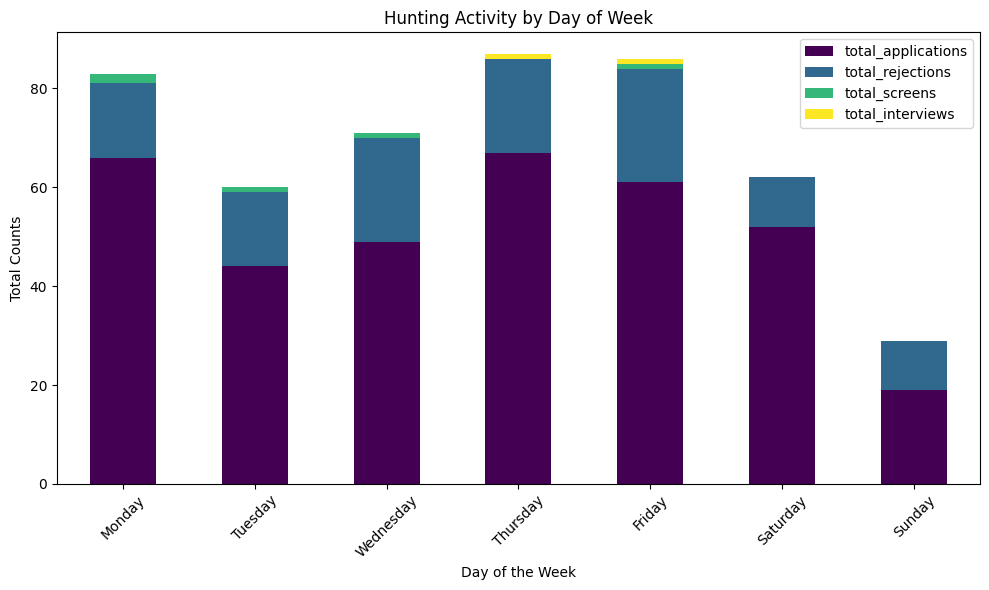

In [5]:

# Plotting the stacked bar chart
ax = dow_totals_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Add labels and title
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Total Counts')
ax.set_title('Hunting Activity by Day of Week')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()